<a href="https://colab.research.google.com/github/cambo2018/Advanced-Dynamics/blob/main/14_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whit-phys-util 1> /dev/null

In [2]:
import whit_phys_util as buc
from sympy import *
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

Mounted at /content/drive


In [3]:
repo = buc.local_repository("https://github.com/cambo2018/Advanced-Dynamics")

Cloning repository from GitHub.


In [4]:
var('hbar E m p theta phi', positive=True)

(hbar, E, m, p, theta, phi)

In [5]:
P = [1, cos(theta)]
delta = [-30*pi/180, 150*pi/180]

energy = 10*1.6e-13 #J
mass = 1.675e-27 #kg

terms = 2
partialwave = hbar/p*sum((2*n +1)*exp(I*delta[n])*sin(delta[n])*P[n] for n in range(terms))

In [6]:
partialwave.simplify()

(-1)**(5/6)*hbar*(3*cos(theta) + 1)/(2*p)

In [7]:
momentum = sqrt(2*E*m)
partialwave = partialwave.subs({p:momentum})

In [8]:
diffcross = partialwave*conjugate(partialwave)  
diffcross.simplify()

hbar**2*(3*cos(theta) + 1)**2/(8*E*m)

In [9]:
params = {E:energy, m:mass, hbar:sc.hbar}
diffcross = diffcross.subs(params).simplify()
diffcross

5.18713488140634e-31*(3*cos(theta) + 1)**2

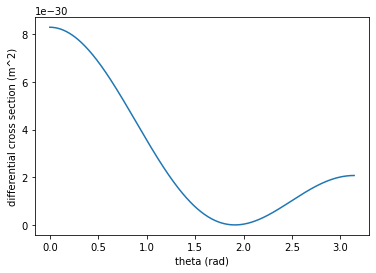

In [10]:
thetarange = np.linspace(0,np.pi,1000)
dx = lambdify(theta, diffcross, 'numpy')

fig, ax = plt.subplots()
ax.plot(thetarange, dx(thetarange))
ax.set_xlabel('theta (rad)')
ax.set_ylabel('differential cross section (m^2)');

In [11]:
integral = diffcross*sin(theta)

In [12]:
sigmaish = integrate(integral, (theta,0,pi))
sigma = integrate(sigmaish, (phi, 0, 2*pi))

In [13]:
sigma

8.29941581025014e-30*pi

In [ ]:
buc.notebook_to_pdf(repo, author="Cameron Brewer", title="14.12")